# HW 4 - Levi Schult 
* notebook with image processing

In [33]:
# import block
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt
from matplotlib import rc
%matplotlib inline
from astropy.visualization import hist
from ccdproc import ImageFileCollection
import ccdproc as ccdp
from astropy.modeling import fitting
from astropy.modeling.models import Polynomial1D,Chebyshev1D,Legendre1D,Hermite1D
from astropy.nddata import CCDData
phot_tutorial_dir = '/Users/levischult/Desktop/classes/ccd-reduction-and-photometry-guide/notebooks/'
import sys
sys.path.insert(0,phot_tutorial_dir)
from convenience_functions import show_image

In [2]:
# setting data directory
data_dir = '/Users/levischult/Desktop/classes/astr_8060_f23/work/schultls/misc_works/imagedataset/'

* displaying log file in notebook for future reference!

In [6]:
! cat /Users/levischult/Desktop/classes/astr_8060_f23/work/schultls/misc_works/imagedataset/log.txt

2009 June 22 local (23rd UT)
Observer: Kobulnicky, J. Runnoe, J. Dornfeld
Clearish, 55F, Humidity 56%
Winds 020 @ 10 mph
Image	Object		exp	Filt	UT	Notes
a005-10	SkyFlats	1	Halpha	
11-14			2	Halpha
15-20			3	Halpha
21			3	U		saturated
22			3	U
23-28			3	U		
29			3	B		     saturated
30			3	B		     saturated
31			3	B		     saturated
32			1	B		     30,000 cts
33			2	B		     
34			3	B		     saturated?
35			3	B	3:13	     
36			3	B	
37			3	B		
38			3	B	
39			4	B	previously not tracking; now tracking
40			5	B    
41			6	B
42			6	B	
43			3	V	3:21
44			6	V	
45			12	V
46			12	V
47			20	V
48			20	V
49			20	V
50			15	R
51			20	R
52			25	R
53			30	R
54			40	R
55			50	R
56			50	I   bad
57			50	I
58			80	I
59			120	I
60			120	I
61			200	I
62			200	I
63 bad
64 focus PG1633+099	2	V	focus=0   3.9 pix fwhm
65 focus			V	focus=200 3.4
66 focus			V	focus=400 5.7
67 focus			V	focus=400 again 6.6 worse!
68 focus			V	focus=250  4.4
69				V	focus=100  3.3
70				V	focus=0	   3.7
71				V	focus=-100 3.1
72				V	foc

In [15]:
# basic image plotting function. taken from image_combination notebook

def basicimgplot(array, titl='Title'):
    min_level = array.min()
    max_level = array.max()
    fig = plt.subplots(1,1,figsize=(4,4))
    plt.imshow(array, vmin=min_level, vmax=max_level)
    plt.xticks([])
    plt.yticks([])
    plt.title(titl)
    plt.grid(False)
    plt.show()

In [46]:
def rms(array):
    return np.sqrt(np.mean(array**2))

# 2

### examining images for overscan regions
* Column 51
* Column 2102
* a123.fits below:

![Screenshot 2023-10-23 at 13.34.16.png](<attachment:Screenshot 2023-10-23 at 13.34.16.png>)
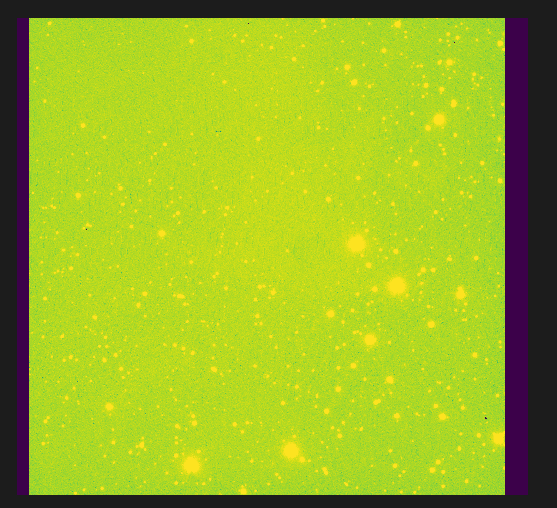

### plotting bias frame!
* a098.fits

![Screenshot 2023-10-23 at 13.42.16.png](<attachment:Screenshot 2023-10-23 at 13.42.16.png>)
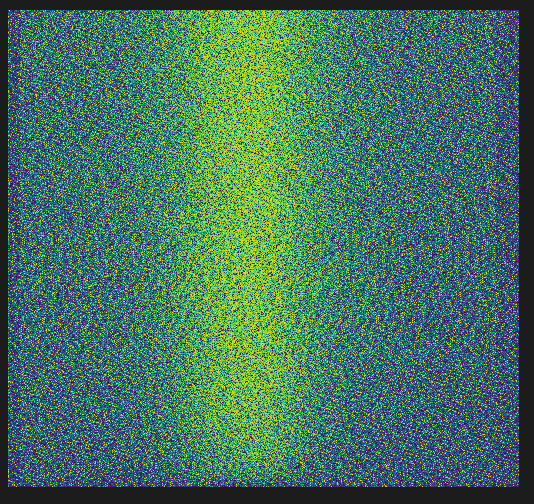

### plotting dark
* d008.fit

![Screenshot 2023-10-23 at 13.44.11.png](<attachment:Screenshot 2023-10-23 at 13.44.11.png>)
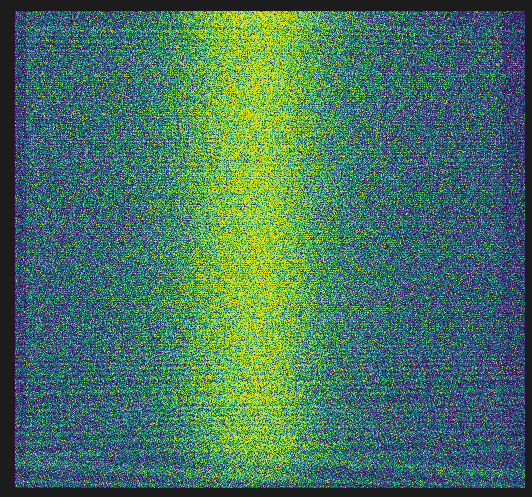

### plotting flat
* a008.fits

![Screenshot 2023-10-23 at 13.46.12.png](<attachment:Screenshot 2023-10-23 at 13.46.12.png>)
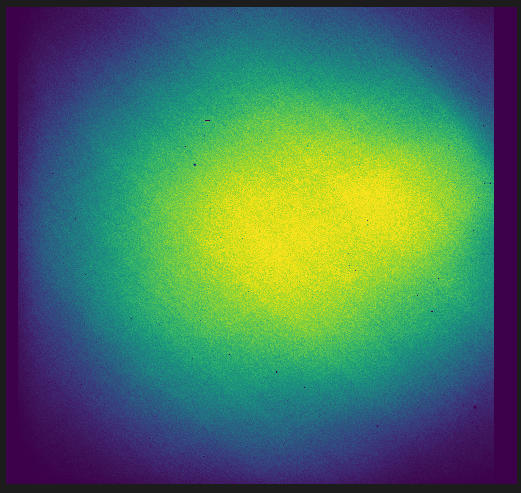

# 3

* plotting lines + columns from bias frame

In [25]:
hdu = fits.open(data_dir+'a098.fits')
hdr = hdu[0].header
img = hdu[0].data

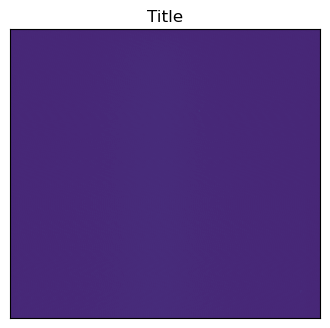

In [28]:
#basicimgplot(img[800:1200, 500:1600])
basicimgplot(img)

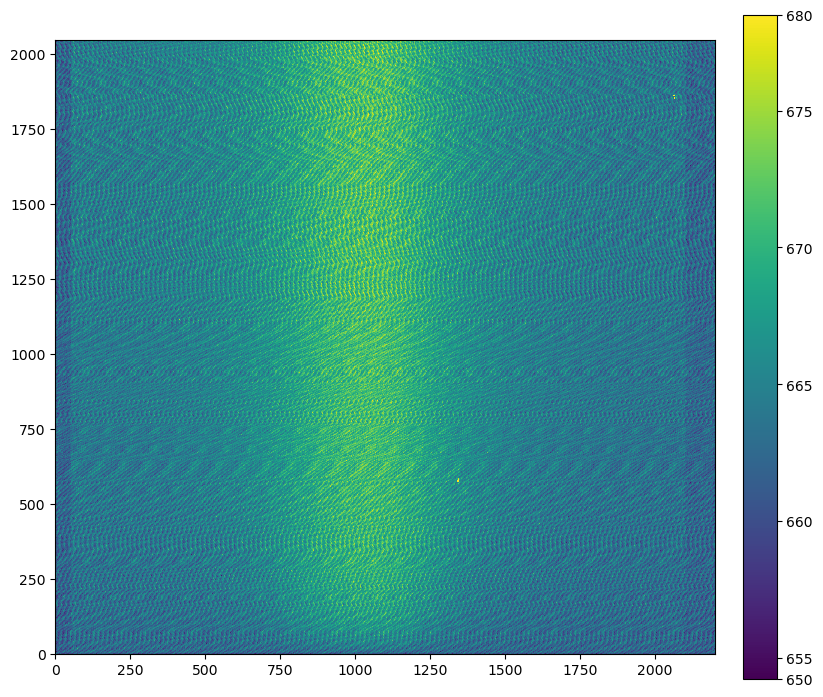

In [34]:
show_image(img)

In [ ]:
min_level = array.min()
max_level = array.max()
fig = plt.subplots(1,1,figsize=(4,4))
plt.imshow(array, vmin=min_level, vmax=max_level)
plt.xticks([])
plt.yticks([])
plt.title(titl)
plt.grid(False)
plt.show()

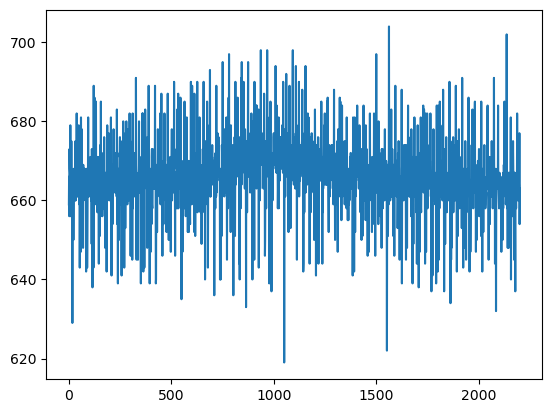

In [35]:
plt.plot(img[1024,:]) # 1024 row

* mean + rms of entire image

In [39]:
mean_bias = np.mean(img)
print(mean_bias)

665.6369082919034


In [40]:
rms_bias = np.sqrt(np.mean(img**2))
print(rms_bias)

212.656196864974


* mean/rms of center of image

In [48]:
bias_center = img[512:1536, 512:1536]
mean_bias = np.mean(bias_center)
print(mean_bias)

668.0392589569092


In [49]:
rms_bias = rms(bias_center)
print(rms_bias)

217.0860314370543


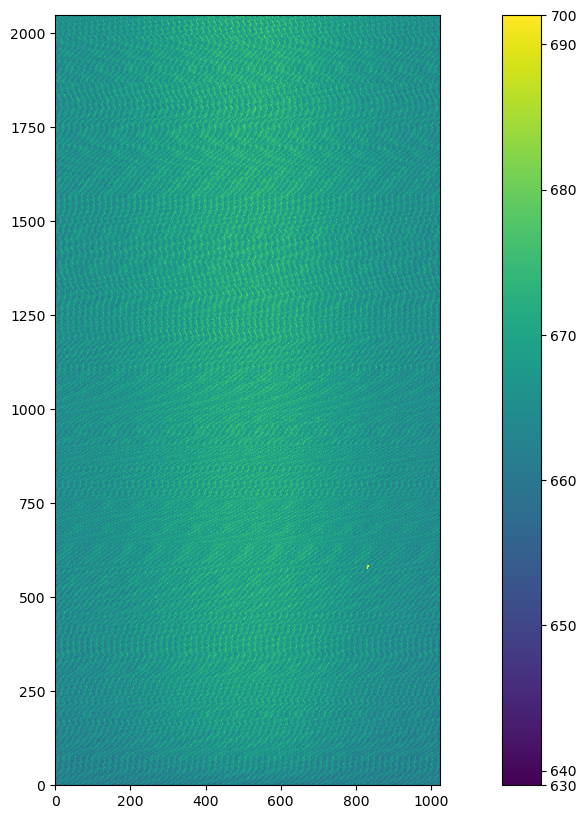

In [45]:
show_image(img[:, 512:1536])